# Mock Spectrum
In this notebook, we will explore how to create mock spectra.

In [1]:
# Imports
import sys
sys.path.insert(0, '/home/carterrhea/Documents/LUCI/')  # Location of Luci
from LUCI.LuciSim import Spectrum
import matplotlib.pyplot as plt

### Inputs
There are a number of inputs we need in order to create a mock spectrum. 

They are the following:

 - lines: List of lines to model (e.x. ['Halpha'])
 - fit_function: Function used to model lines  (options: 'sinc', 'gaussian', 'sincgauss')
 - ampls: List of amplitudes for emission lines
 - velocity: List of velocities of emission lines; if not a list, then all velocities are set equal
 - broadening: List of broadening of emissino lines; ditto above
 - filter: SITELLE Filter (e.x. 'SN3')
 - resolution: Spectral resolution
 - snr: Signal to noise ratio
 


In [2]:
lines = ['Halpha', 'NII6583', 'NII6548', 'SII6716', 'SII6731']
fit_function = 'sincgauss'
ampls = [10, 1, 1, 0.5, 0.45]  # Just randomly choosing these
velocity = 0  # km/s
broadening = 10  # km/s
filter_ = 'SN3'
resolution = 5000
snr = 100

### Create Spectrum
Now we can actually create the spectra with one simple command!

In [5]:
spectrum_axis, spectrum = Spectrum(lines, fit_function, ampls, velocity, broadening, filter_, resolution, snr).create_spectrum()

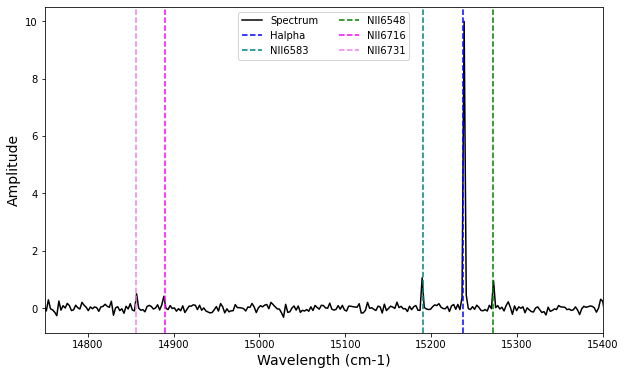

In [6]:
plt.figure(figsize=(10,6))
plt.plot(spectrum_axis, spectrum, color='black', label='Spectrum')
plt.xlim(14750, 15400)
plt.xlabel('Wavelength (cm-1)', fontsize=14)
plt.ylabel('Amplitude', fontsize=14)
plt.axvline(1e7/656.3, label='Halpha', color='blue', linestyle='--')
plt.axvline(1e7/658.3, label='NII6583', color='teal', linestyle='--')
plt.axvline(1e7/654.8, label='NII6548', color='green', linestyle='--')
plt.axvline(1e7/671.6, label='NII6716', color='magenta', linestyle='--')
plt.axvline(1e7/673.1, label='NII6731', color='violet', linestyle='--')
plt.legend(ncol=2)

plt.show()